# Data preparation

## Load data

In [1]:
from oauth2client.service_account import ServiceAccountCredentials
import gspread

In [2]:
import pandas as pd
import numpy as np

In [3]:
def load_sheet():
    SHEET_NAME = "التوانسة كفاه ينتخبوا؟ (Responses)"
    KEY_FILENAME = "cred.json"
    scope = ['https://spreadsheets.google.com/feeds']
    credentials = ServiceAccountCredentials.from_json_keyfile_name(
        KEY_FILENAME, scope)
    gc = gspread.authorize(credentials)
    return gc.open(SHEET_NAME).sheet1

In [4]:
sheet = load_sheet()

In [5]:
columns = {
    "Timestamp": "timestamp",
    "فيما يتعلق بتوقعاتي، أنا نحس أداء المجلس البلدي الحالي  مخيّب للآمال [‌‌]": "satisfaction_overall_1",
    "بعد الانتخابات الأخيرة، أنا في أغلب الأوقات نحس بخيبة أمل أكثر ملّي نحس برضا على أداء المجلس البلدي [‌‌]": "satisfaction_overall_2",
    "بصفة عامّة، أنا راضي(ة) على أداء المجلس البلدي الحالي [‌‌]": "satisfaction_overall_3",
    "فيما يتعلق بتوقعاتي،  نحس تعامل المجلس البلدي الحالي مع الفساد  مخيّب للآمال [‌‌]": "satisfaction_corruption_1",
    "بعد الانتخابات الأخيرة، أنا في أغلب الأوقات نحس بخيبة أمل أكثر ملّي نحس برضا على أداء المجلس البلدي في التعامل مع الفساد [‌‌]": "satisfaction_corruption_2",
    "بصفة عامة، أنا راضي(ة) على أداء المجلس البلدي الحالي في التعامل مع الفساد [‌‌]": "satisfaction_corruption_3",
    "فيما يتعلق بتوقعاتي،  نحس تعامل المجلس البلدي الحالي مع البنية التّحتيّة و تطويرها مخيّب للآمال [‌‌]": "satisfaction_infrastructure_1",
    "بعد الانتخابات الأخيرة، أنا في أغلب الأوقات نحسّ بخيبة أمل أكثر ملّي نحس برضا على أداء المجلس البلدي في التعامل مع البنية التّحتيّة وتطويرها [‌‌]": "satisfaction_infrastructure_2",
    "بصفة عامة، أنا راضي(ة) على أداء المجلس البلدي الحالي في  التعامل مع البنية التّحتيّة وتطويرها [‌‌]": "satisfaction_infrastructure_3",
    "فيما يتعلق بتوقعاتي،  نحس تعامل المجلس البلدي الحالي مع الشّفافيّة  مخيّب للآمال [‌‌]": "satisfaction_transparency_1",
    "بعد الانتخابات الأخيرة، أنا في أغلب الأوقات نحسّ بخيبة أمل أكثر ملّي نحس برضا على أداء المجلس البلدي في التعامل مع الشّفافيّة [‌‌]": "satisfaction_transparency_2",
    "بصفة عامة، أنا راضي(ة) على أداء المجلس البلدي الحالي في  التعامل مع الشّفافيّة [‌‌]": "satisfaction_transparency_3",
    "ديما بش نختار مرشحي/مرشحتى و الا حزبي قبل المنافسين [‌‌]": "loyalty_1",
    "ديما بش نفضل افكار  مرشحي/مرشحتى و الا حزبي قبل المنافسين [‌‌]": "loyalty_2",
    "ديما بش نختار توجّهات  مرشحي/مرشحتى و الا حزبي قبل توجّهات  المنافسين [‌‌]": "loyalty_3",
    "ديما بش نصوّت لمرشحي/لمرشحتى و الا حزبي ضد المنافسين [‌‌]": "loyalty_4",
    "وقت اللي نختار المترشحين و القوائم المترشحة للإنتخبات نقول [‌‌]": "involvement_1",
    "هل ترى انو  الأفراد و القوائم المترشحة للإنتخبات الكل كيف كيف ولا يفرقو على بعضهم؟  [‌‌]": "involvement_2",
    "قداش يهمك انك تختار المترشح(ة) او القائمة المناسبة ؟ [‌‌]": "involvement_3",
    "قداش يهمك تاثير خيارك على نتيجة الانتخابات البلدية ؟ [‌‌]": "involvement_4",
    " حسب رايك، في شكون عندك الثقة إنو ينجم يحقق الشفافية: المجلس البلدي الحالي متاع منطقتك او مجلس بلدي جديد؟": "projective_decision_1",
    " حسب رايك،  في شكون عندك الثقة إنو ينجم يحسن البنية التحتية:   المجلس البلدي الحالي متاع منطقتك او مجلس بلدي جديد؟": "projective_decision_2",
    " حسب رايك، في شكون عندك الثقة  إنو ينجم يحارب  الفساد: المجلس البلدي الحالي متاع منطقتك او مجلس بلدي جديد؟": "projective_decision_3",
    "حسب رايك، في شكون عندك الثقة إنو ينجم يعطي احسن مردود: المجلس البلدي الحالي  او مجلس بلدي جديد؟": "projective_decision_4",
    "بالنسبة لي، الأخبار التلفزيونية مصدر مهم للمعلومات في الانتخابات البلدية [‌‌]": "external_information_1",
    "بالنسبة لي،  الجرائد و المجلّات مصدر مهم للمعلومات بالنسبة للإنتخابات البلدية [‌‌]": "external_information_2",
    "بالنسبة لي، الإنترنت مصدر مهم للمعلومات بالنسبة للإنتخابات البلدية [‌‌]": "external_information_3",
    "بالنسبة لي، الدعاية السياسية هي مصدر مهم للمعلومات بالنسبة للإنتخابات البلدية [‌‌]": "external_information_4",
    "بالنسبة لي، الناس الآخرين (الصحاب،العايلة الخ) هوما مصدر مهم للمعلومات بالنسبة للإنتخابات البلدية [‌‌]": "external_information_5",
    "أنا واثق إني  باش نختار القائمة الانتخابية الصحيحة في الانتخابات البلدية الجاية [‌‌]": "confidence_1",
    "عندي ثقة في قدرتي باش ناخذ القرار الصحيح كيف نختار لشكون باش نصوت في الانتخابات البلدية [‌‌]": "confidence_2",
    "عندي ثقة في قدرتي باش نختار لشكون باش نصوت في الانتخابات البلدية [‌‌]": "confidence_3",
    "قداش عمرك ؟": "age",
    "الجنس": "gender",
    "شنوّة مستواك التّعليمي ؟": "education",
    "قدّاش الدخل الشّهري لعايلتك؟": "income",
    "ما هي حالتك الاجتماعية؟": "marital_status",
    "في انا قطاع تخدم؟": "employment",
    "شنوة اسم البلدية الي تسكن فيها": "residence",
    "فيما يتعلق بتوقعاتي، أنا نحس أداء المجلس البلدي الحالي  مخيّب للآمال [Row 2]": "satisfaction_overall_1_bis"
}

In [6]:
df = pd.DataFrame(sheet.get_all_records())
df.rename(columns=columns, inplace=True)

In [7]:
df.replace({"": np.nan}, inplace=True)

## Recode values

### Recode demographic / socioeconomic values

In [8]:
df.age.replace({
    "أكثر من 64": ">64"
},
    inplace=True)

In [9]:
df.education.replace({
    "ثانوي": "Highschool",
    "الجامعي": "Undergraduate",
    "الدراسات العليا": "Post-graduate",
    "أمي(ة)": "Illiterate",
}, inplace=True)

In [10]:
df.employment.replace({
    "مسؤول(ة)": "Senior official",
    "موظف(ة) إداري(ة)": "Administrative employee",
    "موظف إداري": "Administrative employee",
    "باعث(ة) مشروع ، فلاح(ة) ، تاجر(ة)": "Liberal, agriculturer or merchant",
    "باعث مشروع ، فلاح ، تاجر": "Liberal, agriculturer or merchant",
    "بطّال(ة)": "Unemployed",
    "في الدّار (أب أو أم)": "Stay at home parent",
    "طالب(ة)": "Student",
    "étudiant ": "Student",
    "متقاعد(ة)": "Retired"
}, inplace=True)

In [11]:
df.gender.replace({
    "أنثى": "F",
    "ذكر": "M"
}, inplace=True)

In [12]:
df.income.replace({
    "أقل من 600": "<600",
    "بين 600 و1200": "600-1200",
    "اكثر من 1200": ">1200"
}, inplace=True)

In [13]:
df.marital_status.replace({
    "عازب(ة)": "Single",
    "عازب": "Single",
    "متزوج(ة)": "Married",
    "متزوج": "Married",
    "مطلق(ة)": "Divorced",
    "أرمل(ة)": "Widowed"
}, inplace=True)

### Recode attitudinal columns (Likert scale)

In [14]:
exclude = set(["satisfaction_overall_1_bis", "timestamp", "residence",
               "employment", "marital_status", "gender", "age", "income",
               "education"])
include = list(set(df.columns).difference(exclude))

In [15]:
likert_strongly_agree = ["موافق برشا",
                         "موافق(ة) برشا",
                         "يهمني برشا شكون نختار",
                         "يهمني برشا",
                         "مختلفين على بعضهم"
                         ]

likert_agree = ["موافق",
                "موافق(ة)",
                "يهمني شكون نختار",
                "يهمني",
                "مختلفين على بعضهم مع شوية تشابه"
                ]

likert_indifferent = ["لا موافق(ة) لا مش موافق(ة)",
                      "لاٍموافق(ة) لا مش موافق(ة)",
                      "لاموافق(ة) لا مش موافق(ة)",
                      "لا يهمني لا ميهمنيش شكون نختار",
                      "لا يهمني لا ميهمنيش",
                      "لا موافق لا مش موافق",
                      "ما عنديش راى"
                      ]

likert_disagree = ["مش موافق",
                   "مانيش موافق(ة)",
                   "مش موافق(ة)",
                   "مش موافق, مش موافق(ة)",
                   "مايهمنيش",
                   "مايهمنيش شكون نختار",
                   "كيف كيف  مع شوية اختلاف"
                   ]
likert_strongly_disagree = ["مش موافق بالكل",
                            "مش موافق(ة) بالكل",
                            "مانيش موافق(ة) جملة",
                            "مايهمنيش جملة",
                            "مايهمنيش جملة شكون نختار",
                            "كيف كيف"
                            ]

In [16]:
likert_scale = {}
for i in likert_strongly_agree:
    likert_scale[i] = 5
for i in likert_agree:
    likert_scale[i] = 4
for i in likert_indifferent:
    likert_scale[i] = 3
for i in likert_disagree:
    likert_scale[i] = 2
for i in likert_strongly_disagree:
    likert_scale[i] = 1

In [17]:
projective_coded = {
    "المجلس البلدي الحالي": 0,
    "مجلس بلدي جديد": 1
}

In [18]:
df.replace(likert_scale, inplace=True)
df.replace(projective_coded, inplace=True)

In [19]:
df.fillna(df.mean(), inplace=True)

## Measured constructs

### Overall satisfaction

In [20]:
n_variables = 3
satisfaction_overall_variables = [
    "satisfaction_overall_{}".format(i) for i in range(1, n_variables + 1)]
satisfaction_overall = df[satisfaction_overall_variables]

### Satisfaction with handling corruption

In [21]:
n_variables = 3
satisfaction_corruption_variables = [
    "satisfaction_corruption_{}".format(i) for i in range(1, n_variables + 1)]
satisfaction_corruption = df[satisfaction_corruption_variables]

### Satisfaction with handling infrastructure


In [22]:
n_variables = 3
satisfaction_infrastructure_variables = [
    "satisfaction_infrastructure_{}".format(i) for i in range(1, n_variables + 1)]
satisfaction_infrastructure = df[satisfaction_infrastructure_variables]

### Satisfaction with handling transparency

In [23]:
n_variables = 3
satisfaction_transparency_variables = [
    "satisfaction_transparency_{}".format(i) for i in range(1, n_variables + 1)]
satisfaction_transparency = df[satisfaction_transparency_variables]

### Projective decision

In [24]:
n_variables = 4
projective_decision_variables = [
    "projective_decision_{}".format(i) for i in range(1, n_variables + 1)]
projective_decision = df[projective_decision_variables]

### Loyalty

In [25]:
n_variables = 4
loyalty_variables = ["loyalty_{}".format(i) for i in range(1, n_variables + 1)]
loyalty = df[loyalty_variables]

### Involvement with the decision

In [26]:
n_variables = 4
involvement_variables = ["involvement_{}".format(
    i) for i in range(1, n_variables + 1)]
involvement = df[involvement_variables]

### Confidence (voter)

In [27]:
n_variables = 3
confidence_variables = ["confidence_{}".format(
    i) for i in range(1, n_variables + 1)]
confidence = df[confidence_variables]

### Value of external information

In [28]:
n_variables = 5
external_information_variables = [
    "external_information_{}".format(i) for i in range(1, n_variables + 1)]
external_information = df[external_information_variables]

## Score variables

In [29]:
def score(construct):
    return construct.mean(axis=1)

### Overall satisfaction

In [30]:
df["satisfaction_overall_score"] = score(satisfaction_overall)

### Satisfaction with handling corruption

In [31]:
df["satisfaction_corruption_score"] = score(satisfaction_corruption)

### Satisfaction with handling transparency

In [32]:
df["satisfaction_transparency_score"] = score(satisfaction_transparency)

### Satisfaction with handling infrastructure

In [33]:
df["satisfaction_infrastructure_score"] = score(satisfaction_infrastructure)

### Projective decision

In [34]:
df["projective_decision_score"] = score(projective_decision)

### Loyalty

In [35]:
df["loyalty_score"] = score(loyalty)

### Involvement with the decision

In [36]:
df["involvement_score"] = score(involvement)

### Confidence (voter)

In [37]:
df["confidence_score"] = score(confidence)

# Analysis

In [49]:
import seaborn as sns
import scipy.stats as stats
sns.set_style("whitegrid")

## Crosstab analysis

### Gender and employment

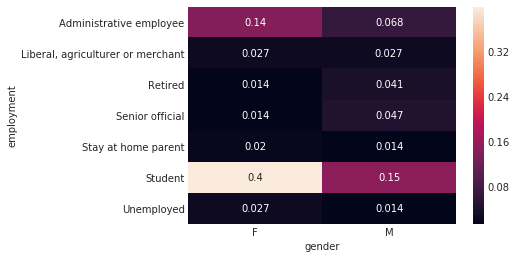

In [46]:
sns.heatmap(pd.crosstab(df.employment, df.gender, normalize=True), annot=True)

## Age and employment

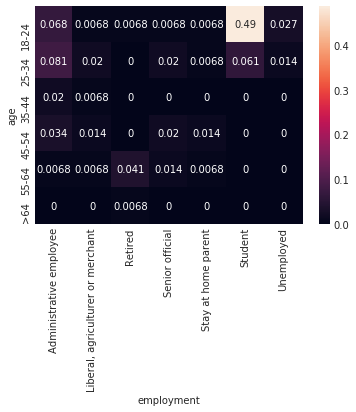

In [47]:
sns.heatmap(pd.crosstab(df.age, df.employment, normalize=True), annot=True)

## ANOVA

In [100]:
def anova(categorical, continuous):
    groups = df[[categorical, continuous]].groupby(categorical).groups
    continuous_groups = list(
        map(lambda group: df[continuous].iloc[groups[group]], groups))
    return stats.f_oneway(*continuous_groups)

### Overall satisfaction

#### ANOVA between overall satisfaction and gender

In [105]:
anova(categorical="gender", continuous="satisfaction_overall_score")

F_onewayResult(statistic=0.18434509357413398, pvalue=0.66829835314848729)

#### ANOVA between overall satisfaction and age

In [106]:
anova("age", "satisfaction_overall_score")

F_onewayResult(statistic=0.64377425284226297, pvalue=0.66667020065733462)

#### ANOVA between overall satisfaction and employment

In [107]:
anova("employment", "satisfaction_overall_score")

F_onewayResult(statistic=1.3798000320595192, pvalue=0.22676150749583723)

#### ANOVA between overall satisfaction and marital status

In [131]:
anova("marital_status", "satisfaction_overall_score")

F_onewayResult(statistic=0.20859916531766895, pvalue=0.64854635699831542)

#### ANOVA between overall satisfaction and income

In [132]:
anova("income", "satisfaction_overall_score")

F_onewayResult(statistic=0.23694758070260746, pvalue=0.78933755662327809)

### Confidence (voter)

#### ANOVA between confidence and gender

In [134]:
anova("gender", "confidence_score")

F_onewayResult(statistic=0.37758327364987798, pvalue=0.53985588049346078)

#### ANOVA between confidence and age

In [135]:
anova("age", "confidence_score")

F_onewayResult(statistic=0.91943114526677727, pvalue=0.47033738017301474)

#### ANOVA between confidence and employment

In [136]:
anova("employment", "confidence_score")

F_onewayResult(statistic=0.79650138787612235, pvalue=0.57416020462254558)

#### ANOVA between confidence and marital status

In [137]:
anova("marital_status", "confidence_score")

F_onewayResult(statistic=0.44809868191043434, pvalue=0.50429645409390078)

#### ANOVA between confidence and income

In [138]:
anova("income", "confidence_score")

F_onewayResult(statistic=1.1485093908236017, pvalue=0.31997664286091426)

### Loyalty

#### ANOVA between loyalty and gender

In [139]:
anova(categorical="gender", continuous="loyalty_score")

F_onewayResult(statistic=0.23290334054585751, pvalue=0.63010214492313488)

#### ANOVA between loyalty and age

In [140]:
anova(categorical="age", continuous="loyalty_score")

F_onewayResult(statistic=4.2636300338580781, pvalue=0.0012132798369676751)

#### ANOVA between loyalty and employment

In [141]:
anova(categorical="employment", continuous="loyalty_score")

F_onewayResult(statistic=2.8951446302704893, pvalue=0.010827120951770131)

#### ANOVA between loyalty and marital_status

In [142]:
anova(categorical="marital_status", continuous="loyalty_score")

F_onewayResult(statistic=15.90022965610536, pvalue=0.0001051783490714185)

#### ANOVA between loyalty and income

In [143]:
anova(categorical="income", continuous="loyalty_score")

F_onewayResult(statistic=0.6225266111339659, pvalue=0.53801484440932446)